# Mangoes : Visualize embeddings

This notebook illustrates how to visualize some properties of embeddings created with mangoes. The examples are applied on an embedding created from a sample of wikipedia. 

In [1]:
import matplotlib.pyplot as plt
import mangoes.visualize

First, we're going to load a pre-created embedding (see the dedicated notebook to see how to create your own). 

In [2]:
embedding = mangoes.Embeddings.load("data/ppmi_svd_1500words_win2//")

## Content of this notebook

1. [Isotropy](#1.-Isotropy)
2. [Distances between words](#2.-Distances-between-words)
2. [t-SNE](#2.-t-SNE)


## 1. Isotropy

Plot in an histogram the repartition around their mean of the values of the partition function $Z_c = \sum_{w}exp(c^Tv_w) $ for 1000 $c$ vectors, chosen by picking a uniformly random direction, of norm $4/\mu_w$, where $\mu_w$ is the average norm or the word vectors.

Ref : Arora et al.(2015) RAND-WALK: A Latent Variable Model Approach to Word Embeddings



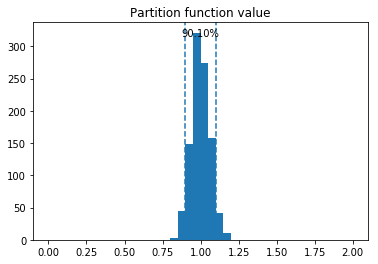

In [3]:
fig = plt.figure() 
ax = plt.subplot() 
mangoes.visualize.plot_isotropy(embedding, ax)
plt.show()

## 2. Distances between words
Plot an histogram of the distances between all the words of the Embeddings.

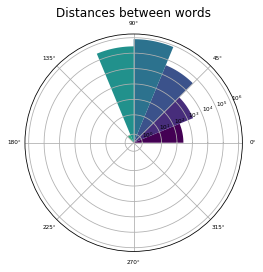

In [4]:
fig = plt.figure() 
ax = plt.subplot(projection="polar") 
mangoes.visualize.plot_distances(embedding, ax)
plt.show()

You can also plot the distances from one specific word :

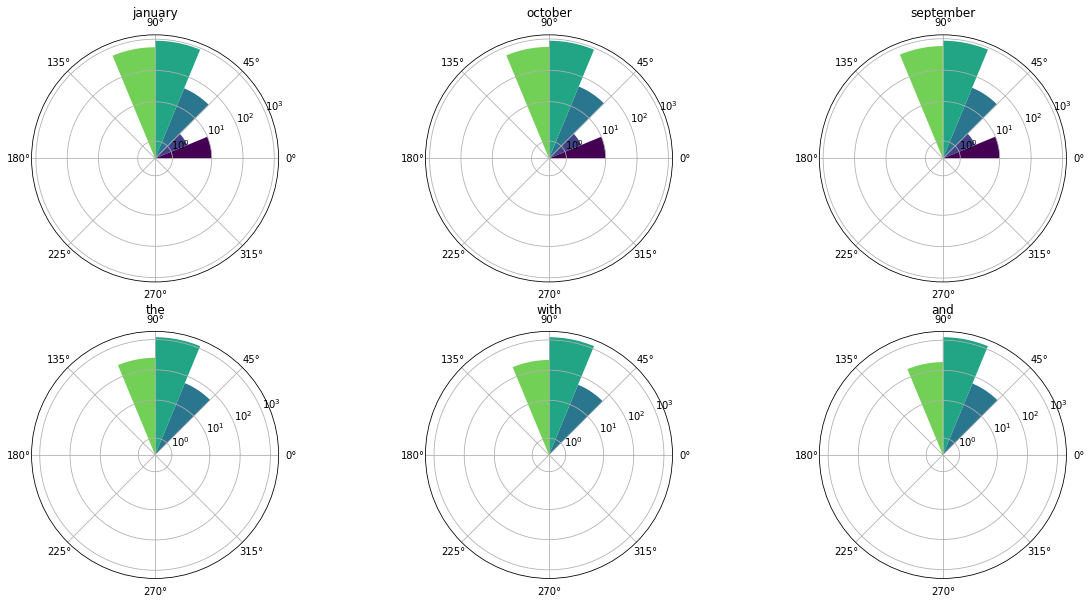

In [5]:
import mangoes.evaluate
import numpy as np


nb_intervals = 8
def plot_distances_one_word(word):
    theta = np.linspace(0.0, np.pi, nb_intervals + 1, endpoint=True)
    ax.set_title(word)
    radii = mangoes.evaluate.distances_one_word_histogram(embedding, word, theta)
    width = np.pi / nb_intervals
    bars = ax.bar(theta[:-1] + width/2, radii, width=width, bottom=0.0)
    ax.set_yscale("symlog")
    for r, bar in zip(theta, bars):
        bar.set_facecolor(plt.cm.viridis(r / 2))


fig = plt.figure(figsize=(20,10))
for i, word in enumerate(["january", "october", "september", 
                          "the", "with", "and"]):
    ax = plt.subplot(2, 3, i+1, projection="polar")   
    plot_distances_one_word(word)

plt.show()

## 3. t-SNE
Create a 2d projections of the embeddings using tsne




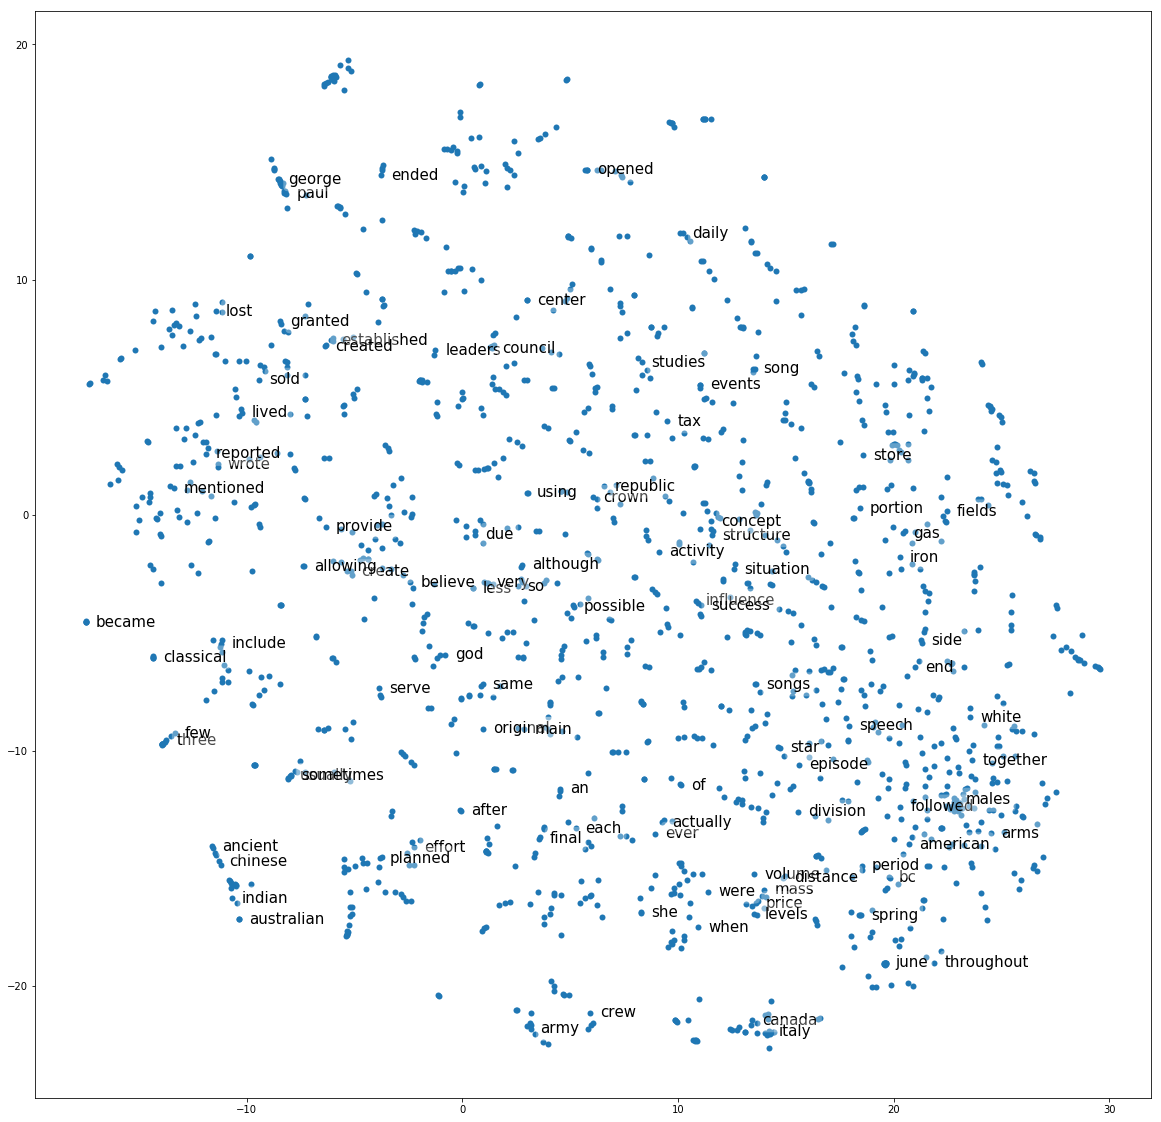

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20))
ax = plt.subplot()
mangoes.visualize.plot_tsne(embedding)


plt.show()